In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sp 
import seaborn as sns

In [3]:
df=pd.read_csv('direct_reports_dataset.csv')
df.head(5)

,employee_id,position,managers_id
0,1001,Analytics Manager,1013.0
1,1002,Data Engineer,1007.0
2,1003,Data Engineer,1001.0
3,1004,Database Developer,1017.0
4,1005,Data Analyst,1001.0


In [4]:
df.shape

(100, 3)

In [5]:
df.columns

Index(['employee_id', 'position', 'managers_id'], dtype='object')

In [6]:
print(df.dtypes)

employee_id      int64
position        object
managers_id    float64
dtype: object


In [7]:
df.isnull().sum()

employee_id    0
position       0
managers_id    4
dtype: int64

In [8]:
df.duplicated().any().sum()

np.int64(0)

In [9]:
df.describe()

,employee_id,managers_id
count,100.000000,96.000000
mean,1845.110000,1009.729167
std,407.056691,6.122399
min,1001.000000,1001.000000
25%,2006.750000,1007.000000
50%,2031.500000,1007.000000
75%,2056.250000,1017.000000
max,2081.000000,1017.000000


In [10]:
df['position'].unique()

array(['Analytics Manager', 'Data Engineer', 'Database Developer',
       'Data Analyst', 'Data Engineering Manager', 'Data Scientist',
       'CTO', 'Data Science Manager'], dtype=object)

In [11]:
print(df[df['position'].str.contains("Manager", case=False, na=False)])

    employee_id                  position  managers_id
0          1001         Analytics Manager       1013.0
6          1007  Data Engineering Manager       1013.0
16         1017      Data Science Manager       1013.0
28         2010  Data Engineering Manager       1013.0
30         2012         Analytics Manager       1013.0
31         2013      Data Science Manager       1013.0
32         2014      Data Science Manager       1013.0
33         2015         Analytics Manager       1013.0
37         2019      Data Science Manager       1013.0
38         2020  Data Engineering Manager       1013.0
41         2023  Data Engineering Manager       1013.0
44         2026      Data Science Manager       1013.0
62         2044      Data Science Manager       1013.0
72         2054         Analytics Manager       1013.0
73         2055  Data Engineering Manager       1013.0
83         2065      Data Science Manager       1013.0
86         2068         Analytics Manager       1013.0
89        

In [12]:
df.groupby("managers_id")["employee_id"].count()

managers_id
1001.0    22
1007.0    27
1013.0    19
1017.0    28
Name: employee_id, dtype: int64

In [13]:
grouped = df.groupby("managers_id")["employee_id"].count()
print(grouped.idxmax())

1017.0


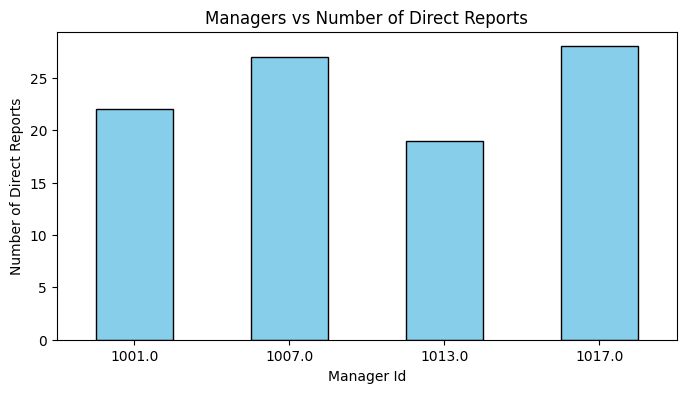

In [14]:
reports_counts=pd.Series({
    1001.0: 22,
    1007.0: 27,
    1013.0: 19,
    1017.0: 28
})
plt.figure(figsize=(8,4))
reports_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Manager Id")
plt.ylabel("Number of Direct Reports")
plt.title("Managers vs Number of Direct Reports")
plt.xticks(rotation=0)
plt.show()

In [15]:
reports = pd.DataFrame({
    'managers_id': [1001.0,1007.0, 1013.0, 1017.0],
    'direct_reports': [22, 27, 19, 28]
})
average_reports=reports['direct_reports'].mean()
print("Average number of direct reports per manager:", average_reports)

Average number of direct reports per manager: 24.0


In [16]:
print("Median: ",reports['direct_reports'].median())
print("Mode:")
print(reports['direct_reports'].mode())

Median:  24.5
Mode:
0    19
1    22
2    27
3    28
Name: direct_reports, dtype: int64


In [17]:
cto_id = df.loc[df['position'].str.contains('CTO', case=False), 'employee_id'].values
cto_id
if len(cto_id) > 0:
    cto_reports_count = df[df['managers_id'] == cto_id[0]].shape[0]
else:
    cto_reports_count = 0
cto_reports_count
total_employees = df.shape[0]
total_employees
prob = cto_reports_count / total_employees
prob


0.19

In [18]:
direct_reports = np.array([22, 27, 19, 28])
print(direct_reports)

[22 27 19 28]


In [19]:
num_managers = 4
manager_influence = np.ones(num_managers)
print(manager_influence)

[1. 1. 1. 1.]


In [20]:
print("Vector Addition: ", direct_reports+manager_influence)
print("Vector Subtraction:", direct_reports-manager_influence)

Vector Addition:  [23. 28. 20. 29.]
Vector Subtraction: [21. 26. 18. 27.]


In [21]:
dot_product = np.dot(direct_reports, manager_influence)
print("Dot Product:",dot_product)

Dot Product: 96.0


In [22]:
multiply = np.multiply(direct_reports, manager_influence)
print(multiply)

[22. 27. 19. 28.]


In [23]:
import sympy as sp
Direct_Reports, Efficiency_Factor, Manager_Experience = sp.symbols('Direct_Reports Efficiency_Factor Manager_Experience')

Productivity_Score = (Direct_Reports * Efficiency_Factor) / Manager_Experience
dPS_dDR = sp.diff(Productivity_Score, Direct_Reports)
dPS_dDR

Efficiency_Factor/Manager_Experience

In [24]:
df['Direct_Reports_Count']=df.groupby('managers_id')['managers_id'].transform('count')
df.head(10)

,employee_id,position,managers_id,Direct_Reports_Count
0,1001,Analytics Manager,1013.0,19.0
1,1002,Data Engineer,1007.0,27.0
2,1003,Data Engineer,1001.0,22.0
3,1004,Database Developer,1017.0,28.0
4,1005,Data Analyst,1001.0,22.0
5,1006,Data Engineer,1017.0,28.0
6,1007,Data Engineering Manager,1013.0,19.0
7,1008,Database Developer,1001.0,22.0
8,1009,Data Engineer,1007.0,27.0
9,1010,Data Scientist,1017.0,28.0


In [25]:
df['Is_Manager']=df['position'].apply(lambda x: 1 if 'Manager' in x else 0)
df.head(10)

,employee_id,position,managers_id,Direct_Reports_Count,Is_Manager
0,1001,Analytics Manager,1013.0,19.0,1
1,1002,Data Engineer,1007.0,27.0,0
2,1003,Data Engineer,1001.0,22.0,0
3,1004,Database Developer,1017.0,28.0,0
4,1005,Data Analyst,1001.0,22.0,0
5,1006,Data Engineer,1017.0,28.0,0
6,1007,Data Engineering Manager,1013.0,19.0,1
7,1008,Database Developer,1001.0,22.0,0
8,1009,Data Engineer,1007.0,27.0,0
9,1010,Data Scientist,1017.0,28.0,0


In [26]:
avg_reports=df['Direct_Reports_Count'].mean()
print(avg_reports)
df['High_Team_Size']=df['Direct_Reports_Count'].apply(lambda x: 1 if x>avg_reports else 0)
print(df['High_Team_Size'].value_counts())
df.head(5)

24.5625
High_Team_Size
1    55
0    45
Name: count, dtype: int64


,employee_id,position,managers_id,Direct_Reports_Count,Is_Manager,High_Team_Size
0,1001,Analytics Manager,1013.0,19.0,1,0
1,1002,Data Engineer,1007.0,27.0,0,1
2,1003,Data Engineer,1001.0,22.0,0,0
3,1004,Database Developer,1017.0,28.0,0,1
4,1005,Data Analyst,1001.0,22.0,0,0


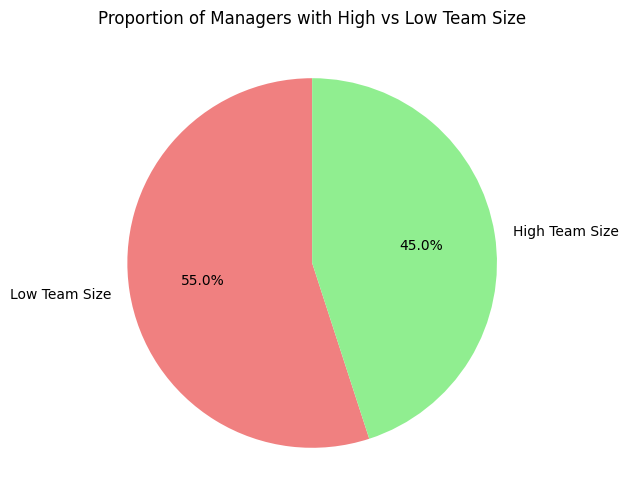

In [28]:
team_size_counts = df['High_Team_Size'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    team_size_counts,
    labels=['Low Team Size','High Team Size'],
    autopct='%1.1f%%',
    colors=['lightcoral','lightgreen'],
    startangle=90
)
plt.title('Proportion of Managers with High vs Low Team Size')
plt.show()

In [29]:
df['Manager_Rank']=df['Direct_Reports_Count'].rank(method='dense', ascending=False).astype('Int64')
df.head(10)

,employee_id,position,managers_id,Direct_Reports_Count,Is_Manager,High_Team_Size,Manager_Rank
0,1001,Analytics Manager,1013.0,19.0,1,0,4
1,1002,Data Engineer,1007.0,27.0,0,1,2
2,1003,Data Engineer,1001.0,22.0,0,0,3
3,1004,Database Developer,1017.0,28.0,0,1,1
4,1005,Data Analyst,1001.0,22.0,0,0,3
5,1006,Data Engineer,1017.0,28.0,0,1,1
6,1007,Data Engineering Manager,1013.0,19.0,1,0,4
7,1008,Database Developer,1001.0,22.0,0,0,3
8,1009,Data Engineer,1007.0,27.0,0,1,2
9,1010,Data Scientist,1017.0,28.0,0,1,1


In [30]:
managers_gt3=df[df['Direct_Reports_Count']>3][['managers_id', 'Direct_Reports_Count']].drop_duplicates()
print(managers_gt3)

   managers_id  Direct_Reports_Count
0       1013.0                  19.0
1       1007.0                  27.0
2       1001.0                  22.0
3       1017.0                  28.0


In [31]:
sorted_managers=(
    df[df['managers_id'].notna()]
    .drop_duplicates(subset=['managers_id'])
    .sort_values(by=['Direct_Reports_Count','employee_id'],
                 ascending=[False, True])
)
print(sorted_managers[['managers_id','Direct_Reports_Count','employee_id']])

   managers_id  Direct_Reports_Count  employee_id
3       1017.0                  28.0         1004
1       1007.0                  27.0         1002
2       1001.0                  22.0         1003
0       1013.0                  19.0         1001


In [32]:
managers=df.drop_duplicates(subset=['managers_id'])
largest_team=managers.loc[managers['Direct_Reports_Count'].idxmax()]
print(largest_team[['managers_id', 'position', 'Direct_Reports_Count']])

managers_id                         1017.0
position                Database Developer
Direct_Reports_Count                  28.0
Name: 3, dtype: object


In [33]:
avg_team_size=managers['Direct_Reports_Count'].mean()
print("Average team size:", avg_team_size)

Average team size: 24.0


In [34]:
below_avg=managers[managers['Direct_Reports_Count']<avg_team_size]
print(below_avg[['managers_id', 'position', 'Direct_Reports_Count']])

   managers_id           position  Direct_Reports_Count
0       1013.0  Analytics Manager                  19.0
2       1001.0      Data Engineer                  22.0


In [35]:
managers=df.drop_duplicates(subset=['managers_id']).copy()
managers['Manager_Type']=managers['position'].str.replace('Manager','').str.strip()
title_corr=managers.groupby('Manager_Type')['Direct_Reports_Count'].mean().reset_index()
print(title_corr)

         Manager_Type  Direct_Reports_Count
0           Analytics                  19.0
1                 CTO                   NaN
2       Data Engineer                  24.5
3  Database Developer                  28.0


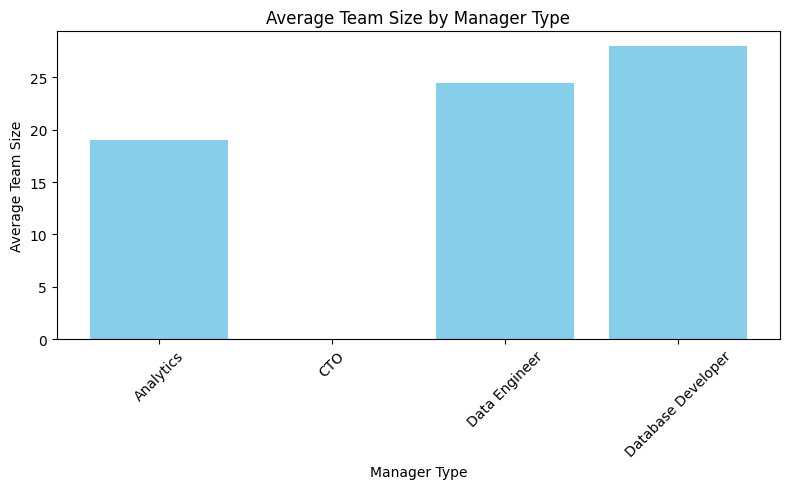

In [36]:
plt.figure(figsize=(8,5))
plt.bar(title_corr['Manager_Type'], title_corr['Direct_Reports_Count'], color='skyblue')
plt.xlabel('Manager Type')
plt.ylabel('Average Team Size')
plt.title('Average Team Size by Manager Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()